In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
X = dataset.iloc[:,3:5]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


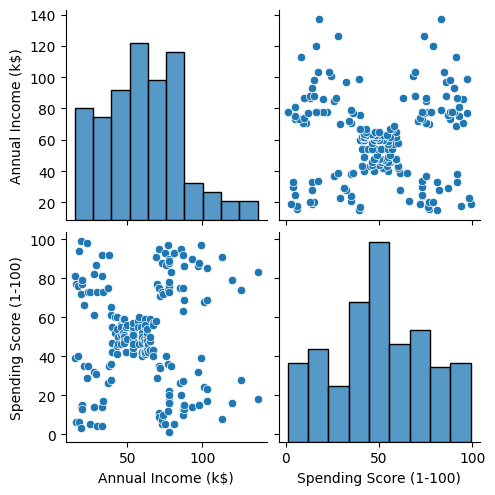

In [15]:
import seaborn as sns

# Pair plot to visualize data
sns.pairplot(X)  # Replace with your column names
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [17]:
from sklearn.cluster import DBSCAN
 # eps is the maximum distance between two samples to be considered as in the same neighborhood
dbscan=DBSCAN(eps=0.3, min_samples=8)
labels=dbscan.fit_predict(X)
dbscan

DBSCAN(eps=0.3, min_samples=8)

In [18]:
n_clusters=len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of Clusters found: {n_clusters}")

Number of Clusters found: 5


In [19]:
supervised=dataset
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
supervised['Cluster_groups']=labels
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_groups
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


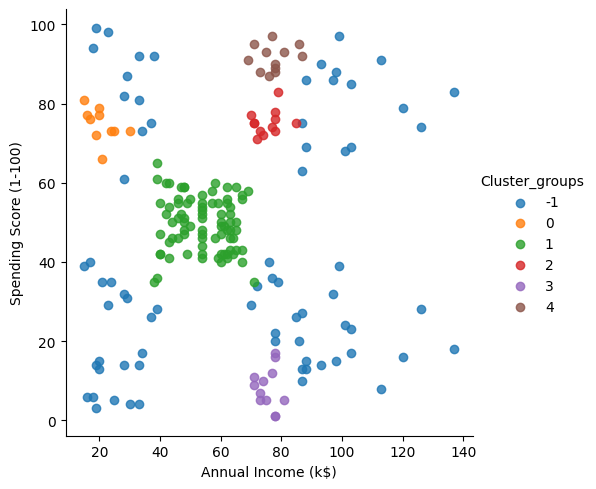

In [21]:
import seaborn as sns
facet=sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], fit_reg=False)